In [1]:
import statsmodels as sm
#https://www.statsmodels.org/dev/vector_ar.html
import pandas as pd

In [2]:
#https://stackoverflow.com/questions/20681297/vector-autoregressive-model-fitting-with-scikit-learn
#https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/
#https://blog.devgenius.io/implementing-vector-autoregression-from-scratch-with-python-b12eedbf35ad
#https://notes.quantecon.org/submission/5cc8e7dd4174bb001a39a8ff

#Bayesian VAR
#https://github.com/joergrieger/pybvar

In [3]:
#RMSE loss function

In [4]:
train_df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/twitter_reddit_time_series_copy2.csv')
train_df = train_df.set_index('date')
#train = train.iloc[20:,:]
train_df

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag
date,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444
...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959


In [5]:
#train_df = train.iloc[:,4:]
train_df

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag
date,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444
...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959


In [6]:
#https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [16]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
df = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(df.shape)  # (123, 8)
df.tail()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0
1989-04-01,4132.5,4044.1,186.1,134.8,129.3,111.1,129.0,100.6
1989-07-01,4162.9,4068.4,187.4,137.2,130.2,109.8,129.9,98.2


In [17]:
#Visualising time series

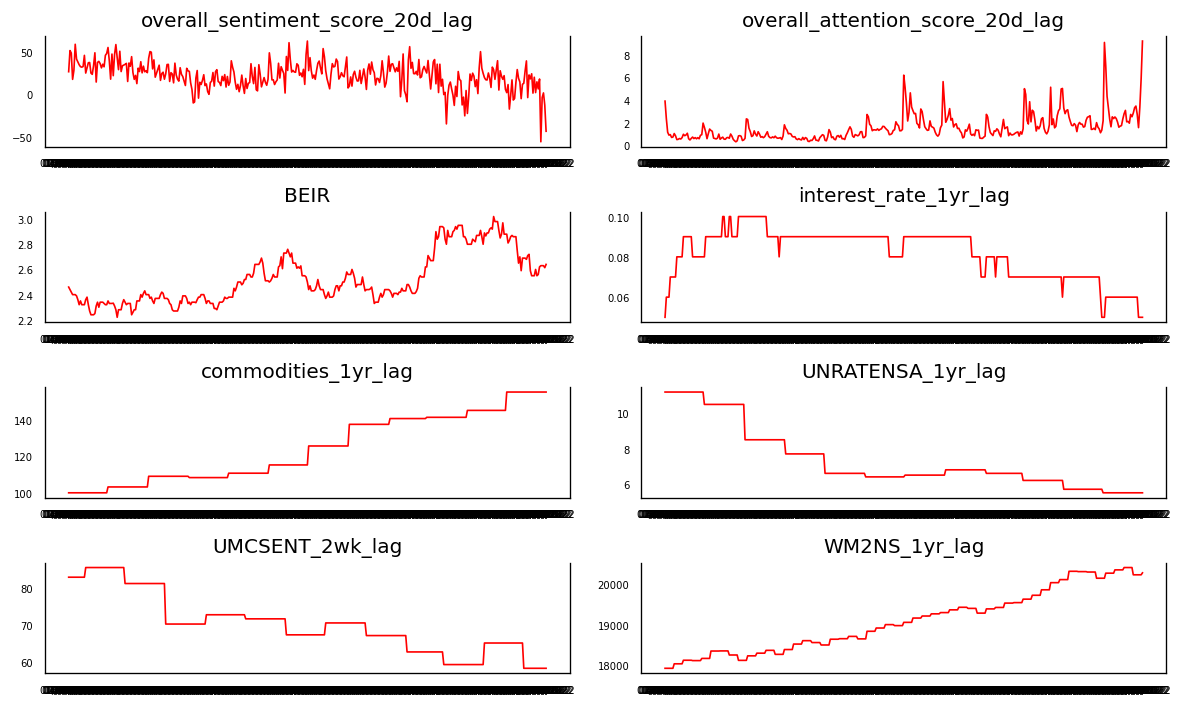

In [8]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = train_df[train_df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(train_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [9]:
#Granger causality test

In [10]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)  

NameError: name 'df' is not defined

In [11]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(train_df, variables = train_df.columns)  

/Users/aashrit/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)


,overall_sentiment_score_20d_lag_x,overall_attention_score_20d_lag_x,BEIR_x,interest_rate_1yr_lag_x,commodities_1yr_lag_x,UNRATENSA_1yr_lag_x,UMCSENT_2wk_lag_x,WM2NS_1yr_lag_x,gdp_1yr_lag_x
overall_sentiment_score_20d_lag_y,1.0000,0.0000,0.0001,0.0003,0.0000,0.0000,0.0000,0.0000,0.0000
overall_attention_score_20d_lag_y,0.0021,1.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001
BEIR_y,0.0227,0.0356,1.0000,0.2165,0.1209,0.0434,0.0020,0.0525,0.0704
interest_rate_1yr_lag_y,0.0003,0.2591,0.0053,1.0000,0.0000,0.0004,0.0000,0.0000,0.0000
commodities_1yr_lag_y,0.5139,0.0001,0.2413,0.2642,1.0000,0.4093,0.7968,0.0083,0.6282
UNRATENSA_1yr_lag_y,0.5040,0.6916,0.4411,0.0425,0.8691,1.0000,0.2437,0.0375,0.2335
UMCSENT_2wk_lag_y,0.0228,0.0088,0.2582,0.9392,0.0240,0.0204,1.0000,0.0461,0.0108
WM2NS_1yr_lag_y,0.0093,0.0000,0.0458,0.1279,0.0206,0.0061,0.0018,1.0000,0.0004
gdp_1yr_lag_y,0.8600,0.0014,0.1724,0.0109,0.0654,0.6144,0.3670,0.0074,1.0000


In [12]:
#Cointegration test

In [13]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(train_df)
#cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
overall_sentiment_score_20d_lag ::  181.0     > 179.5199  =>   True
overall_attention_score_20d_lag ::  131.28    > 143.6691  =>   False
BEIR   ::  98.2      > 111.7797  =>   False
interest_rate_1yr_lag ::  70.99     > 83.9383   =>   False
commodities_1yr_lag ::  47.39     > 60.0627   =>   False
UNRATENSA_1yr_lag ::  28.43     > 40.1749   =>   False
UMCSENT_2wk_lag ::  15.11     > 24.2761   =>   False
WM2NS_1yr_lag ::  7.49      > 12.3212   =>   False
gdp_1yr_lag ::  0.61      > 4.1296    =>   False


In [14]:
#Train test split

In [15]:
nobs = 31
df_train, df_test = train_df[0:-nobs], train_df[-nobs:]

In [16]:
df_train
#df_test1

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag
date,,,,,,,,,
01/06/2021,26.4459,3.900597,2.46,0.05,99.875276,11.2,82.9,17915.4,19477.444
02/06/2021,51.3641,2.348224,2.44,0.06,99.875276,11.2,82.9,17915.4,19477.444
03/06/2021,48.4431,1.156789,2.42,0.06,99.875276,11.2,82.9,17915.4,19477.444
04/06/2021,17.4456,0.903695,2.40,0.06,99.875276,11.2,82.9,17915.4,19477.444
05/06/2021,28.1433,0.947890,2.40,0.07,99.875276,11.2,82.9,17915.4,19477.444
...,...,...,...,...,...,...,...,...,...
26/04/2022,27.5878,2.004162,2.85,0.07,145.041207,5.7,65.2,20150.2,22740.959
27/04/2022,21.1544,1.617477,2.88,0.07,145.041207,5.7,65.2,20150.2,22740.959
28/04/2022,17.5450,1.453405,2.97,0.07,145.041207,5.7,65.2,20150.2,22740.959


In [17]:
#Stationarity test

In [18]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')
    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [19]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    #print(name, column)

    Augmented Dickey-Fuller Test on "overall_sentiment_score_20d_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0226
 No. Lags Chosen       = 9
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0328. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "overall_attention_score_20d_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6919
 No. Lags Chosen       = 12
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0754. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 

In [20]:
train_df_differenced = df_train.diff().dropna()

In [21]:
for name, column in train_df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "overall_sentiment_score_20d_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.8918
 No. Lags Chosen       = 9
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "overall_attention_score_20d_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.8068
 No. Lags Chosen       = 11
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 Null Hypothesis: Data has un

In [22]:
df_train

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag
date,,,,,,,,,
01/06/2021,26.4459,3.900597,2.46,0.05,99.875276,11.2,82.9,17915.4,19477.444
02/06/2021,51.3641,2.348224,2.44,0.06,99.875276,11.2,82.9,17915.4,19477.444
03/06/2021,48.4431,1.156789,2.42,0.06,99.875276,11.2,82.9,17915.4,19477.444
04/06/2021,17.4456,0.903695,2.40,0.06,99.875276,11.2,82.9,17915.4,19477.444
05/06/2021,28.1433,0.947890,2.40,0.07,99.875276,11.2,82.9,17915.4,19477.444
...,...,...,...,...,...,...,...,...,...
26/04/2022,27.5878,2.004162,2.85,0.07,145.041207,5.7,65.2,20150.2,22740.959
27/04/2022,21.1544,1.617477,2.88,0.07,145.041207,5.7,65.2,20150.2,22740.959
28/04/2022,17.5450,1.453405,2.97,0.07,145.041207,5.7,65.2,20150.2,22740.959


In [23]:
train_df_differenced

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag
date,,,,,,,,,
02/06/2021,24.9182,-1.552373,-0.02,0.01,0.0,0.0,0.0,0.0,0.0
03/06/2021,-2.9210,-1.191435,-0.02,0.00,0.0,0.0,0.0,0.0,0.0
04/06/2021,-30.9975,-0.253094,-0.02,0.00,0.0,0.0,0.0,0.0,0.0
05/06/2021,10.6977,0.044196,0.00,0.01,0.0,0.0,0.0,0.0,0.0
06/06/2021,30.6460,-0.248359,0.00,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
26/04/2022,22.7377,0.614587,-0.06,0.00,0.0,0.0,0.0,-153.6,0.0
27/04/2022,-6.4334,-0.386685,0.03,0.00,0.0,0.0,0.0,0.0,0.0
28/04/2022,-3.6094,-0.164072,0.09,0.00,0.0,0.0,0.0,0.0,0.0


In [24]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    #fig.savefig(name)
    fig.suptitle(f"Historical trends of VAR {leveltype} variables", 
                 fontsize=14, fontweight="bold", fontname="Verdana")

In [25]:
train_df_differenced.columns

Index(['overall_sentiment_score_20d_lag', 'overall_attention_score_20d_lag',
       'BEIR', 'interest_rate_1yr_lag', 'commodities_1yr_lag',
       'UNRATENSA_1yr_lag', 'UMCSENT_2wk_lag', 'WM2NS_1yr_lag', 'gdp_1yr_lag'],
      dtype='object')

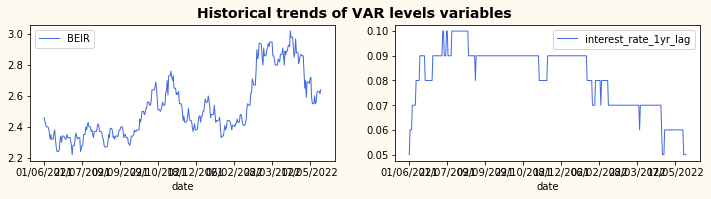

In [26]:
plot_vars(train_df, levels = ['BEIR', 'interest_rate_1yr_lag'], color="royalblue", leveltype="levels", name='levels1')

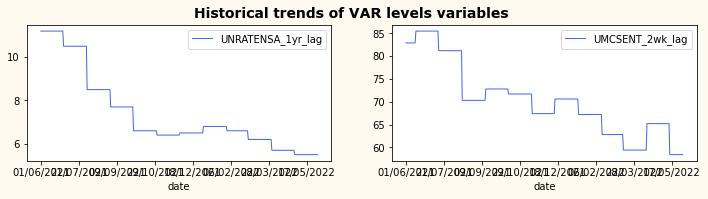

In [27]:
plot_vars(train_df, levels = ['UNRATENSA_1yr_lag', 'UMCSENT_2wk_lag'], color="royalblue", leveltype="levels", name='levels2')

In [ ]:
plot_vars(train_df, levels = ['exchange_rate', 'commodity_index'], color="royalblue", leveltype="levels", name='levels3')

In [ ]:
plot_vars(train_df, levels = ['m2', 'gdp'], color="royalblue", leveltype="levels", name='levels4')

In [ ]:
plot_vars(train_df, levels = ['overall_sentiment_score', 'overall_attention_score'], color="royalblue", leveltype="levels", name='levels5')

In [ ]:
plot_vars(train_df_differenced, levels = ['BEIR', 'int_rate'], color="firebrick", leveltype="difference", name='difference1')

In [ ]:
plot_vars(train_df_differenced, levels = ['unemp', 'michigan_sentiment'], color="firebrick", leveltype="difference", name='difference2')

In [ ]:
plot_vars(train_df_differenced, levels = ['exchange_rate', 'commodity_index'], color="firebrick", leveltype="difference", name='difference3')

In [ ]:
plot_vars(train_df_differenced, levels = ['m2', 'gdp'], color="firebrick", leveltype="difference", name='difference4')

In [ ]:
plot_vars(train_df_differenced, levels = ['overall_sentiment_score', 'overall_attention_score'], color="firebrick", leveltype="difference", name='difference5')

In [ ]:
#Selecting appropriate lag
train_df_differenced

In [52]:
model = VAR(train_df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    
#Almost all criteria hit minimum at 1 lag

/Users/aashrit/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aashrit/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Lag Order = 1
AIC :  -1.800511536590029
BIC :  -0.7689990450162825
FPE :  0.16524145888206468
HQIC:  -1.3891449228520658 

Lag Order = 2
AIC :  -1.708730682001188
BIC :  0.25550569923590505
FPE :  0.18130155028246756
HQIC:  -0.9253098478706792 

Lag Order = 3
AIC :  -1.4676655637360554
BIC :  1.433459736033801
FPE :  0.2313127542263301
HQIC:  -0.31044877864538023 

Lag Order = 4
AIC :  -1.3071609455513071
BIC :  2.5350494830349204
FPE :  0.2729241735952038
HQIC:  0.22560665388264534 

Lag Order = 5
AIC :  -1.1931883709441982
BIC :  3.5943349030528617
FPE :  0.3083745767783438
HQIC:  0.7168981745745491 

Lag Order = 6
AIC :  -0.9183561217525034
BIC :  4.8187395497892105
FPE :  0.4109383084951909
HQIC:  1.370830907263298 

Lag Order = 7
AIC :  -0.6535103328311314
BIC :  6.037449457559125
FPE :  0.544965632545856
HQIC:  2.016572261874301 

Lag Order = 8
AIC :  -0.31451514820494264
BIC :  7.334632989612404
FPE :  0.7831854141644896
HQIC:  2.738271780098194 

Lag Order = 9
AIC :  -0.1056010

In [53]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 05, Aug, 2022
Time:                     15:49:02
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                  -0.768999
Nobs:                     332.000    HQIC:                  -1.38914
Log likelihood:          -3850.90    FPE:                   0.165241
AIC:                     -1.80051    Det(Omega_mle):        0.126511
--------------------------------------------------------------------
Results for equation overall_sentiment_score_20d_lag
                                        coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------
const                                     -0.273673         0.792009           -0.346           0.730
L1.overall_sentiment_score_20d_lag        -0.384412 

In [54]:
#Checking for serial correlation#
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(train_df_differenced.columns, out):
    print(str(col), ':', round(val, 2))

overall_sentiment_score_20d_lag : 2.24
overall_attention_score_20d_lag : 2.08
BEIR : 2.0
interest_rate_1yr_lag : 1.98
commodities_1yr_lag : 2.06
UNRATENSA_1yr_lag : 2.0
UMCSENT_2wk_lag : 2.01
WM2NS_1yr_lag : 2.03
gdp_1yr_lag : 2.01


In [55]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = train_df_differenced.values[-lag_order:]
forecast_input

1


array([[-1.6188000e+01,  2.3070916e-01,  0.0000000e+00, -1.0000000e-02,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00]])

In [56]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_train.index[-nobs:], columns=df_train.columns + '_1d')
df_forecast

,overall_sentiment_score_20d_lag_1d,overall_attention_score_20d_lag_1d,BEIR_1d,interest_rate_1yr_lag_1d,commodities_1yr_lag_1d,UNRATENSA_1yr_lag_1d,UMCSENT_2wk_lag_1d,WM2NS_1yr_lag_1d,gdp_1yr_lag_1d
date,,,,,,,,,
31/03/2022,4.020054,-0.088301,0.011325,0.000375,-0.032558,-0.036541,-0.069529,8.005500,40.412872
01/04/2022,-1.591686,0.028617,-0.000885,0.000217,0.111730,-0.016370,-0.052272,6.405924,7.797184
02/04/2022,0.392811,-0.018977,0.001695,-0.000092,0.150994,-0.015838,-0.054460,6.578366,9.579031
03/04/2022,-0.271047,0.001839,0.001307,-0.000013,0.130474,-0.016914,-0.052957,6.815345,10.130837
04/04/2022,-0.060691,-0.005743,0.001392,-0.000030,0.137045,-0.016668,-0.053301,6.742665,9.992051
05/04/2022,-0.127383,-0.003259,0.001362,-0.000025,0.135004,-0.016718,-0.053238,6.756930,10.010398
06/04/2022,-0.106014,-0.004046,0.001372,-0.000027,0.135657,-0.016704,-0.053254,6.753552,10.007469
07/04/2022,-0.112888,-0.003796,0.001369,-0.000026,0.135447,-0.016709,-0.053248,6.754659,10.008490
08/04/2022,-0.110678,-0.003876,0.001370,-0.000027,0.135515,-0.016707,-0.053250,6.754277,10.008094


In [57]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [58]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)

In [59]:
df_results
#.iloc[:,6:]

,overall_sentiment_score_20d_lag_1d,overall_attention_score_20d_lag_1d,BEIR_1d,interest_rate_1yr_lag_1d,commodities_1yr_lag_1d,UNRATENSA_1yr_lag_1d,UMCSENT_2wk_lag_1d,WM2NS_1yr_lag_1d,gdp_1yr_lag_1d,overall_sentiment_score_20d_lag_forecast,overall_attention_score_20d_lag_forecast,BEIR_forecast,interest_rate_1yr_lag_forecast,commodities_1yr_lag_forecast,UNRATENSA_1yr_lag_forecast,UMCSENT_2wk_lag_forecast,WM2NS_1yr_lag_forecast,gdp_1yr_lag_forecast
date,,,,,,,,,,,,,,,,,,
31/03/2022,4.020054,-0.088301,0.011325,0.000375,-0.032558,-0.036541,-0.069529,8.005500,40.412872,9.651454,1.254446,2.891325,0.050375,145.008649,5.663459,65.130471,20158.205500,22781.371872
01/04/2022,-1.591686,0.028617,-0.000885,0.000217,0.111730,-0.016370,-0.052272,6.405924,7.797184,8.059768,1.283063,2.890440,0.050592,145.120379,5.647089,65.078198,20164.611424,22789.169055
02/04/2022,0.392811,-0.018977,0.001695,-0.000092,0.150994,-0.015838,-0.054460,6.578366,9.579031,8.452579,1.264085,2.892135,0.050500,145.271373,5.631251,65.023738,20171.189790,22798.748086
03/04/2022,-0.271047,0.001839,0.001307,-0.000013,0.130474,-0.016914,-0.052957,6.815345,10.130837,8.181533,1.265924,2.893442,0.050487,145.401847,5.614337,64.970782,20178.005135,22808.878924
04/04/2022,-0.060691,-0.005743,0.001392,-0.000030,0.137045,-0.016668,-0.053301,6.742665,9.992051,8.120841,1.260182,2.894834,0.050457,145.538892,5.597669,64.917481,20184.747800,22818.870974
05/04/2022,-0.127383,-0.003259,0.001362,-0.000025,0.135004,-0.016718,-0.053238,6.756930,10.010398,7.993458,1.256923,2.896196,0.050432,145.673896,5.580951,64.864242,20191.504730,22828.881372
06/04/2022,-0.106014,-0.004046,0.001372,-0.000027,0.135657,-0.016704,-0.053254,6.753552,10.007469,7.887444,1.252877,2.897568,0.050405,145.809554,5.564247,64.810989,20198.258282,22838.888842
07/04/2022,-0.112888,-0.003796,0.001369,-0.000026,0.135447,-0.016709,-0.053248,6.754659,10.008490,7.774556,1.249081,2.898937,0.050378,145.945001,5.547538,64.757740,20205.012942,22848.897332
08/04/2022,-0.110678,-0.003876,0.001370,-0.000027,0.135515,-0.016707,-0.053250,6.754277,10.008094,7.663878,1.245205,2.900307,0.050351,146.080515,5.530831,64.704490,20211.767219,22858.905425


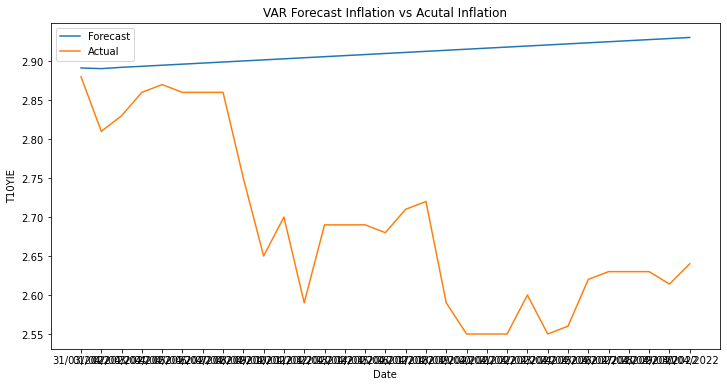

In [60]:
#Sentiment same plot
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
plt.savefig('var_trad_forecast.png')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

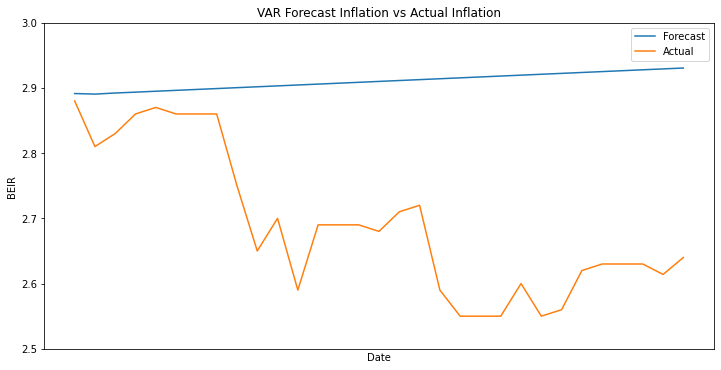

In [63]:
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('BEIR')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Actual Inflation')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylim(2.5,3)
# show a legend on the plot
plt.legend()
plt.savefig('var_forecast.png')
# Display a figure.
plt.show()

In [48]:
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

In [67]:
#Forecast MSE
metrics.mean_squared_error(df_results['BEIR_forecast'], df_test['BEIR'], squared = False)

0.24970444197771371

In [68]:
rmse = metrics.mean_squared_error(df_results['BEIR_forecast'], df_test['BEIR'], squared = False)
error = (rmse/np.mean(df_test['BEIR']))*100
error
#We see that the RMSE is quite low compared to the mean (9.3% of the size of the mean overall), 
#which means that XGBoost did quite a good job at predicting the values of the test set. 

9.280022180100614

### LASSO Approach

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd 
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.simplefilter('ignore')

In [ ]:
X_train = df_train.drop(['BEIR'],axis=1)
y_train = df_train['BEIR']
X_test = df_test.drop(['BEIR'],axis=1)
y_test = df_test['BEIR']

In [ ]:
def train_test_plot(model, X_train, X_test):
    """
    This will plot the actual values of CPI against the one fitted by the model
    We train the model until 2009 and then use it from 2009 onwards on the test features dataset
    """
    fig, ax = plt.subplots(figsize=(12,4))
    colors = sns.color_palette("deep", 8)
    
    yvalues = pd.DataFrame(y_test)
    
    forecasted = list(model.predict(X_test)) # Use the model fit on features data from 2009 onwards
    df_fcast = pd.DataFrame({"date": list(yvalues.index), "BEIR_fcast": forecasted})
    df_fcast = df_fcast.set_index("date")
    
    df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)

    df["BEIR_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
    df["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
    ax.set_title("BEIR vs. Model's BEIR")
    ax.set_ylabel("BEIR")
    ax.legend(["Forecasted BEIR","Actual BEIR"])

In [ ]:
lasso = linear_model.LassoCV(cv=model_selection.TimeSeriesSplit(n_splits=5), 
                             alphas=None, tol = 10000, normalize=True) 

lasso = lasso.fit(X_train, y_train)
optimal_alpha = lasso.alpha_

lasso2 = linear_model.Lasso(alpha=optimal_alpha, normalize=True)
lasso2.fit(X_train, y_train)

train_test_plot(lasso2, X_train, X_test) 

In [ ]:
metrics.mean_squared_error(y_test, lasso2.predict(X_test), squared = False)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_results.index, lasso2.predict(X_test), label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, y_test, label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
lasso_coefs = pd.DataFrame({"features":list(X_train), "coef": lasso2.coef_})
lasso_coefs = lasso_coefs[lasso_coefs.coef != 0.0]
lasso_coefs.sort_values("coef", ascending=False)

In [ ]:
lasso_coefficients = ["BEIR"]

for i in lasso_coefs.iloc[:,0]:
    lasso_coefficients.append(i)
    
lasso_coefficients

In [ ]:
#Building the VAR w/these features

In [ ]:
nobs = 31
df_train, df_test = train_df[0:-nobs], train_df[-nobs:]

In [ ]:
df_train_lasso = df_train[[i for i in lasso_coefficients]]
df_test_lasso = df_test[[i for i in lasso_coefficients]]

In [ ]:
df_train_lasso

In [ ]:
for name, column in df_train_lasso.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    #print(name, column)

In [ ]:
train_df_differenced_lasso = df_train_lasso.diff().dropna()

In [ ]:
for name, column in train_df_differenced_lasso.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    #print(name, column)

In [ ]:
model = VAR(train_df_differenced_lasso)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    
#Almost all criteria hit minimum at 1 lag

In [ ]:
model_fitted = model.fit(1)
model_fitted.summary()

In [ ]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = train_df_differenced_lasso.values[-lag_order:]
forecast_input

In [ ]:
train_df_differenced_lasso
df_train_lasso
forecast_input

In [ ]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)

In [ ]:
# Forecast

df_forecast = pd.DataFrame(fc, index=df_train_lasso.index[-nobs:], columns=df_train_lasso.columns + '_1d')
df_forecast

In [ ]:
train_df

In [ ]:
df_results = invert_transformation(df_train_lasso, df_forecast, second_diff=False)

In [ ]:
#Sentiment same plot
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test_lasso['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
plt.savefig('var_trad_forecast.png')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
#Forecast MSE
metrics.mean_squared_error(df_results['BEIR_forecast'], df_test['BEIR'], squared = False)

### XGBoost

In [104]:
#!pip install xgboost
from xgboost import XGBRegressor, plot_importance

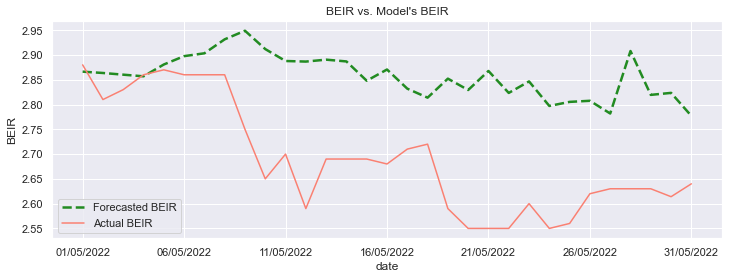

In [105]:
# Build XGBoost
# Normalize the features 
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

train_test_plot(model=xgb, X_train=X_train_scaled, X_test=X_test_scaled)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

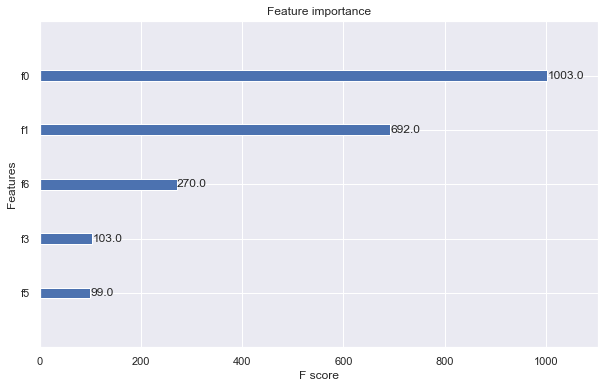

In [106]:
fig_xgb, ax_xgb = plt.subplots(figsize=(10,6))
plot_importance(xgb, max_num_features=5, ax=ax_xgb)

In [108]:
for i, name in dict(zip(list(range(len(X_train.columns))), list(X_train.columns.values))).items():
    if i == 0:
        print(f"Feature {i} is {name}")
    elif i == 1:
        print(f"Feature {i} is {name}")
    elif i == 6:
        print(f"Feature {i} is {name}")
    elif i == 3:
        print(f"Feature {i} is {name}")
    elif i == 5:
        print(f"Feature {i} is {name}")

Feature 0 is overall_sentiment_score_20d_lag
Feature 1 is overall_attention_score_20d_lag
Feature 3 is commodities_1yr_lag
Feature 5 is UMCSENT_2wk_lag
Feature 6 is WM2NS_1yr_lag


In [88]:
metrics.mean_squared_error(y_test, xgb.predict(X_test), squared = False)

0.11200560421772461

In [192]:
xgb_coefficients = ["BEIR"]

for i, name in dict(zip(list(range(len(X_train.columns))), list(X_train.columns.values))).items():
    if i == 0:
        xgb_coefficients.append(name)
    elif i == 1:
        xgb_coefficients.append(name)
    elif i == 6:
        xgb_coefficients.append(name)
    elif i == 3:
        xgb_coefficients.append(name)
    elif i == 5:
        xgb_coefficients.append(name)
        
xgb_coefficients

['BEIR',
 'overall_sentiment_score_20d_lag',
 'overall_attention_score_20d_lag',
 'commodities_1yr_lag',
 'UMCSENT_2wk_lag',
 'WM2NS_1yr_lag']

In [193]:
df_train_xgb = df_train[[i for i in xgb_coefficients]]
df_test_xgb = df_test[[i for i in xgb_coefficients]]

In [198]:
train_df_differenced_xgb = df_train_xgb.diff().dropna()

In [199]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, Aug, 2022
Time:                     17:11:58
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -10.1436
Nobs:                     332.000    HQIC:                  -10.4330
Log likelihood:          -1020.78    FPE:                2.43018e-05
AIC:                     -10.6250    Det(Omega_mle):     2.14422e-05
--------------------------------------------------------------------
Results for equation BEIR
                                        coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------
const                                      0.001821         0.001957            0.931           0.352
L1.BEIR                                   -0.042172         0.054972           

In [200]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = train_df_differenced_xgb.values[-lag_order:]
forecast_input

1


array([[  0.        , -16.188     ,   0.23070916,   0.        ,
          0.        ,   0.        ]])

In [202]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_train_xgb.index[-nobs:], columns=df_train_xgb.columns + '_1d')
df_forecast

,BEIR_1d,overall_sentiment_score_20d_lag_1d,overall_attention_score_20d_lag_1d,commodities_1yr_lag_1d,UMCSENT_2wk_lag_1d,WM2NS_1yr_lag_1d
date,,,,,,
31/03/2022,5.743396e-03,5.944796,-0.138277,-0.000438,-0.011729,7.323637
01/04/2022,2.255228e-07,-2.287322,0.052500,0.000150,-0.018955,6.826183
02/04/2022,1.819679e-03,0.675898,-0.024628,-0.000094,-0.015916,6.758297
03/04/2022,1.213510e-03,-0.397144,0.003986,-0.000004,-0.017001,6.747535
04/04/2022,1.431196e-03,-0.006025,-0.006372,-0.000037,-0.016607,6.759664
05/04/2022,1.351482e-03,-0.148881,-0.002617,-0.000025,-0.016751,6.754812
06/04/2022,1.380663e-03,-0.096694,-0.003985,-0.000029,-0.016698,6.756497
07/04/2022,1.370000e-03,-0.115756,-0.003485,-0.000028,-0.016718,6.755904
08/04/2022,1.373894e-03,-0.108794,-0.003668,-0.000028,-0.016711,6.756118


In [204]:
df_results = invert_transformation(df_train_xgb, df_forecast, second_diff=False)

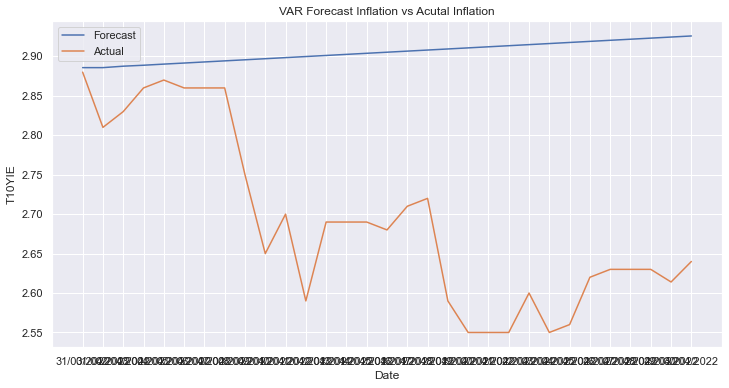

In [205]:
#Sentiment same plot
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
plt.savefig('var_trad_forecast.png')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [206]:
#Forecast MSE
metrics.mean_squared_error(df_results['BEIR_forecast'], df_test['BEIR'], squared = False)

0.24568607801222778

# Hyperparameter optimisation via grid search

In [106]:
from sklearn.model_selection import GridSearchCV

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True,
                       scoring ='neg_root_mean_squared_error')

xgb_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[15:07:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=0.7,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.03, max_bin=256,
                                    max_cat_to_o...
                                    n_jobs=4, nthread=4, num_parallel_tree=1,
                                    objective='reg:linear', predictor='auto',
                                    random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
  

In [115]:
results_df = pd.DataFrame(xgb_grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]].head()

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
0.7_1_reg:linear_4_500_4_7_0.03_0.7,"{'subsample': 0.7, 'silent': 1, 'objective': '...",1,-0.146111,0.108065
0.7_1_reg:linear_4_500_4_7_0.07_0.7,"{'subsample': 0.7, 'silent': 1, 'objective': '...",2,-0.146126,0.109474
0.7_1_reg:linear_4_500_4_6_0.03_0.7,"{'subsample': 0.7, 'silent': 1, 'objective': '...",3,-0.146473,0.106703
0.7_1_reg:linear_4_500_4_5_0.03_0.7,"{'subsample': 0.7, 'silent': 1, 'objective': '...",4,-0.146597,0.106292
0.7_1_reg:linear_4_500_4_6_0.07_0.7,"{'subsample': 0.7, 'silent': 1, 'objective': '...",5,-0.147852,0.110095


In [107]:
#print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [108]:
xgb_grid.best_params_
xgb_grid.best_score_*-1

0.1615598016344026

[14:56:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:56:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




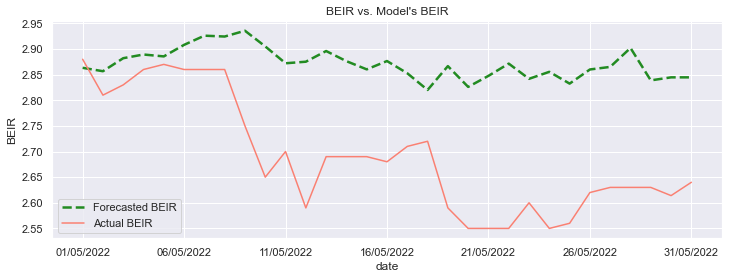

In [100]:
# Build XGBoost with optimised hyperparameters
# Normalize the features 
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

xgb = XGBRegressor(colsample_bytree = xgb_grid.best_params_['colsample_bytree'],learning_rate = xgb_grid.best_params_['learning_rate'],max_depth = xgb_grid.best_params_['max_depth'],
                  min_child_weight = xgb_grid.best_params_['min_child_weight'],n_estimators = xgb_grid.best_params_['n_estimators'],nthread = xgb_grid.best_params_['nthread'],
                  objective = xgb_grid.best_params_['objective'],silent = xgb_grid.best_params_['silent'],subsample = xgb_grid.best_params_['subsample'])
xgb.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

train_test_plot(model=xgb, X_train=X_train_scaled, X_test=X_test_scaled)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

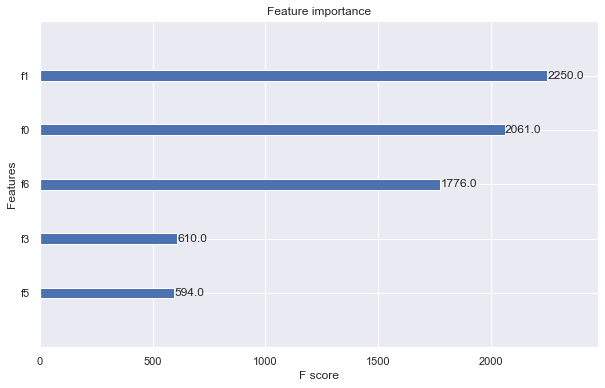

In [101]:
fig_xgb, ax_xgb = plt.subplots(figsize=(10,6))
plot_importance(xgb, max_num_features=5, ax=ax_xgb)

In [102]:
# Feature selection

for i, name in dict(zip(list(range(len(X_train.columns))), list(X_train.columns.values))).items():
    if i == 0:
        print(f"Feature {i} is {name}")
    elif i == 1:
        print(f"Feature {i} is {name}")
    elif i == 6:
        print(f"Feature {i} is {name}")
    elif i == 3:
        print(f"Feature {i} is {name}")
    elif i == 5:
        print(f"Feature {i} is {name}")

Feature 0 is overall_sentiment_score_20d_lag
Feature 1 is overall_attention_score_20d_lag
Feature 3 is commodities_1yr_lag
Feature 5 is UMCSENT_2wk_lag
Feature 6 is WM2NS_1yr_lag


In [103]:
metrics.mean_squared_error(y_test, xgb.predict(X_test), squared = False)

0.11200560421772461

[14:52:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:52:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Param

[14:52:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:52:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Param

[14:52:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:52:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Param

In [ ]:
#Overall, traditional method performs best - then XGBoost then LASSO
#Although LASSO and XGBoost agree that unemp, int_rate, michigan_sentiment,
#and overall_attention_score are most important, they both perform worse than 
#the traditional, vanilla VAR model that also includes overall_sentiment_score

### Random Search

In [117]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'subsample': [0.5,0.75, 1],
              'colsample_bytree': [0.7, 1],
              'n_estimators': [500]}

xgb_random = RandomizedSearchCV(xgb,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True,
                       scoring ='neg_root_mean_squared_error',
                             random_state = 1)

xgb_random.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[16:48:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.7,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.03, max_bin=256,
                                          max_ca...
                                          objective='reg:linear',
                                          predictor='auto', random_state=0, ...),


In [118]:
results_df = pd.DataFrame(xgb_random.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]].head()

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
0.7_1_reg:linear_4_500_4_7_0.03_0.7,"{'subsample': 0.7, 'silent': 1, 'objective': '...",1,-0.146111,0.108065
0.7_1_reg:linear_4_500_4_7_0.07_0.7,"{'subsample': 0.7, 'silent': 1, 'objective': '...",2,-0.146126,0.109474
0.7_1_reg:linear_4_500_4_6_0.03_0.7,"{'subsample': 0.7, 'silent': 1, 'objective': '...",3,-0.146473,0.106703
0.7_1_reg:linear_4_500_4_5_0.03_0.7,"{'subsample': 0.7, 'silent': 1, 'objective': '...",4,-0.146597,0.106292
0.7_1_reg:linear_4_500_4_6_0.07_0.7,"{'subsample': 0.7, 'silent': 1, 'objective': '...",5,-0.147852,0.110095


In [119]:
xgb_random.best_params_
xgb_random.best_score_*-1

0.14611086446258736

[16:48:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




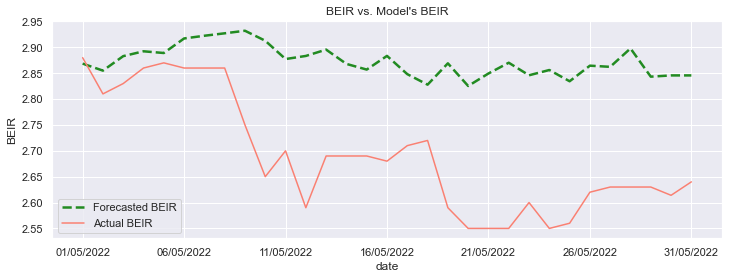

[16:48:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:48:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Param

[16:48:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:48:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Param

[16:48:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:48:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Param

In [120]:
# Build XGBoost with optimised hyperparameters
# Normalize the features 
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

xgb = XGBRegressor(colsample_bytree = xgb_grid.best_params_['colsample_bytree'],learning_rate = xgb_grid.best_params_['learning_rate'],max_depth = xgb_grid.best_params_['max_depth'],
                  min_child_weight = xgb_grid.best_params_['min_child_weight'],n_estimators = xgb_grid.best_params_['n_estimators'],nthread = xgb_grid.best_params_['nthread'],
                  objective = xgb_grid.best_params_['objective'],silent = xgb_grid.best_params_['silent'],subsample = xgb_grid.best_params_['subsample'])
xgb.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

train_test_plot(model=xgb, X_train=X_train_scaled, X_test=X_test_scaled)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

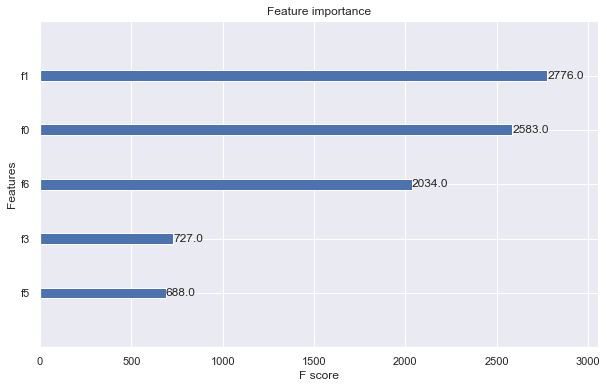

In [112]:
fig_xgb, ax_xgb = plt.subplots(figsize=(10,6))
plot_importance(xgb, max_num_features=5, ax=ax_xgb)

In [113]:
# Feature selection

for i, name in dict(zip(list(range(len(X_train.columns))), list(X_train.columns.values))).items():
    if i == 0:
        print(f"Feature {i} is {name}")
    elif i == 1:
        print(f"Feature {i} is {name}")
    elif i == 6:
        print(f"Feature {i} is {name}")
    elif i == 3:
        print(f"Feature {i} is {name}")
    elif i == 5:
        print(f"Feature {i} is {name}")

Feature 0 is overall_sentiment_score_20d_lag
Feature 1 is overall_attention_score_20d_lag
Feature 3 is commodities_1yr_lag
Feature 5 is UMCSENT_2wk_lag
Feature 6 is WM2NS_1yr_lag


In [114]:
metrics.mean_squared_error(y_test, xgb.predict(X_test), squared = False)

0.1115708491441252


[15:07:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Para


[15:07:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Para


[15:07:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Para


[15:07:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Para

In [ ]:
0.11200560421772461